In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
def func():
    runs = 10
    steps = 100
    bandits = 10
    eps = [0, .01, .1]
    q = np.zeros(bandits) # true values
    results = np.zeros([3,runs,steps-1])
    optimal = np.zeros([3,runs,steps-1])
    for i in range(bandits):
        q[i] = np.random.normal(0,1)
    for l, epsilon in enumerate(eps):
        for k in range(runs):
            R = np.zeros([steps,bandits]) # actual rewards
            gained_reward = np.zeros(steps-1) # gained reward in each step
            A = np.zeros(steps) # selected actions
            opt = np.zeros(steps-1) # percentage of optimal choice
            Q = np.zeros(bandits) # value
            counts = np.zeros(bandits) # counts of numbers each bandit was selected
            for j in range(steps-1):
                if np.random.rand() < epsilon:
                    A[j] = np.random.randint(bandits)
                else:
    #                 A[j] = np.argmax(Q)
                    index = np.where(Q == np.amax(Q))
                    A[j] = random.choice(index[0])
                idx = A[j].astype(int)
                counts[idx] = counts[idx] + 1
                R[j,idx] = np.random.normal(q[idx],1)
                gained_reward[j] = R[j,idx]
    #             Q[idx] = (counts[idx] * Q[idx] + R[j,idx])/(counts[idx]+1)
                Q[idx] = Q[idx] + (1/counts[idx]) * (R[j,idx] - Q[idx])
                if idx == np.argmax(q): #np.where(q == np.amax(q))[0][0]:
                    opt[j] = 100
            results[l,k,] = np.cumsum(gained_reward)/np.arange(1,steps)
            optimal[l,k,] = np.cumsum(opt)/np.arange(1,steps)

In [6]:
%load_ext line_profiler
%lprun -f func func()

In [164]:
%load_ext memory_profiler
%mprun -f func func()

ERROR: Could not find file <ipython-input-15-486639d4f612>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [10]:
%load_ext cython

In [62]:
del runs, steps, bandits, l, i, k, A, index, idx, q, epsilon, eps, R, gained_reward, opt, Q

NameError: name 'l' is not defined

In [161]:
%%cython
import numpy as np
import random
# import cython

cpdef funcx():
#     cython.declare(l=cython.int,
#                    i=cython.int,
#                    k=cython.int,
#                    epsilon=cython.double,
#                    runs=cython.int,
#                    steps=cython.int,
#                    bandits=cython.int,
#                    q=cython.double,
#                    eps=cython.double,
#                    results=cython.double,
#                    optimal=cython.double,
#                    R=cython.double,
#                    gained_rewards=cython.double,
#                    A=cython.int,
#                    opt=cython.double,
#                    Q=cython.double,
#                    index=cython.int,
#                    idx=cython.int)
    
    cdef int runs, steps, bandits, l, i, k, idx
    cdef int index
    cdef int A[100]
    cdef float epsilon
    cdef float q[10]
    cdef float eps[3]
    cdef float gained_reward[99]
    cdef float opt[99]
    cdef float Q[10] 
    cdef float R[100][10]
    cdef float results[3][10][99]
    cdef float optimal[3][10][99]

    runs = 10
    steps = 100
    bandits = 10
    eps = [0, .01, .1]
    q = np.zeros(bandits) 
    results = np.zeros([3,runs,steps-1])
    optimal = np.zeros([3,runs,steps-1])
    for i in range(bandits):
        q[i] = np.random.normal(0,1)
    for l, epsilon in enumerate(eps):
        for k in range(runs):
            R = np.zeros([steps,bandits]) 
            gained_reward = np.zeros(steps-1) 
            A = np.zeros(steps) 
            opt = np.zeros(steps-1) 
            Q = np.zeros(bandits) 
            counts = np.zeros(bandits) 
            for j in range(steps-1):
                if np.random.rand() < epsilon:
                    A[j] = np.random.randint(bandits)
                else:
                    index = np.argmax(Q)
                    A[j] = index
                idx = A[j]
                counts[idx] = counts[idx] + 1
                R[j][idx] = np.random.normal(q[idx],1)
                gained_reward[j] = R[j][idx]
                Q[idx] = Q[idx] + (1/counts[idx]) * (R[j][idx] - Q[idx])
                if idx == np.argmax(q): 
                    opt[j] = 100
            results[l][k] = np.cumsum(gained_reward)/np.arange(1,steps)
            optimal[l][k] = np.cumsum(opt)/np.arange(1,steps)
#     return runs, steps, bandits, l, i, k, A, index, idx, q, epsilon, eps, R, gained_reward, opt, Q
    return results
funcx()


Error compiling Cython file:
------------------------------------------------------------
...
    cdef float opt[99]
    cdef float Q[10] 
    cdef float R[100][10]
#     cdef float results[3][10][99]
    cdef float optimal[3][10][99]
    global results[3][10][99]
                 ^
------------------------------------------------------------

/Users/hashem/.ipython/cython/_cython_magic_699e729e78527ca99d115a06ca2b6cfd.pyx:37:18: Syntax error in simple statement list


In [162]:
from numba import jit
funcj = jit(func)
%timeit func()
%timeit funcj()

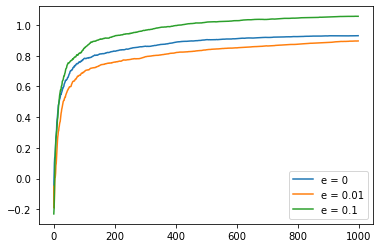

In [8]:
plt.plot(range(steps-1), np.mean(results[0],0), label = 'e = 0')
plt.plot(range(steps-1), np.mean(results[1],0), label = 'e = 0.01')
plt.plot(range(steps-1), np.mean(results[2],0), label = 'e = 0.1')
plt.legend()

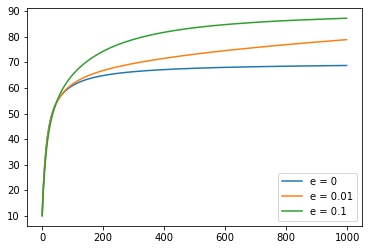

In [30]:
plt.plot(range(steps-1), np.mean(optimal[0],0), label = 'e = 0')
plt.plot(range(steps-1), np.mean(optimal[1],0), label = 'e = 0.01')
plt.plot(range(steps-1), np.mean(optimal[2],0), label = 'e = 0.1')
plt.legend()